In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nasa_gmao = pd.read_csv('../Resources/NASA_GMAO_062012_FULL_LDC.csv')
nasa_gmao['MON'] = pd.to_datetime(nasa_gmao['MON'], format = '%H%M %d %b %Y')
nasa_gmao['START'] = nasa_gmao['MON'].dt.month
nasa_gmao['TARGET'] = ((nasa_gmao['START'] + nasa_gmao['L']).astype(int))%12
nasa_gmao['TARGET'] = nasa_gmao['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START'
nasa_gmao_mean = nasa_gmao.groupby(['L', 'START'])['LDC_SST_NASA_GMAO_062012'].mean().reset_index()
nasa_gmao_mean.rename(columns={'LDC_SST_NASA_GMAO_062012': 'MEAN_SST_NASA_GMAO_062012'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START'
nasa_gmao_var = nasa_gmao.groupby(['L', 'START'])['LDC_SST_NASA_GMAO_062012'].var().reset_index()
nasa_gmao_var.rename(columns={'LDC_SST_NASA_GMAO_062012': 'VAR_SST_NASA_GMAO_062012'}, inplace=True)

# Merge the mean and variance DataFrames
nasa_gmao_stat = pd.merge(nasa_gmao_mean, nasa_gmao_var, on=['L', 'START'])
nasa_gmao_stat.head(20)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa_gmao_stat['TARGET'] = ((nasa_gmao_stat['START'] + nasa_gmao_stat['L']).astype(int))%12
nasa_gmao_stat['TARGET'] = nasa_gmao_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa_gmao_stat['SZN'] = nasa_gmao_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_NASA_GMAO_062012','VAR_SST_NASA_GMAO_062012']
nasa_gmao_stat = nasa_gmao_stat[new_order]

nasa_gmao_stat.to_csv('../Resources/nasa_gmao_stat.csv', index=False)

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_gmao_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa_gmao = nasa_gmao_stat[nasa_gmao_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa_gmao.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa_gmao.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa_gmao = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_gmao_stat_dfs[f'lead{lead}'] = filtered_nasa_gmao
    
nasa_gmao_stat_dfs['lead5']


,L,START,TARGET,SZN,MEAN_SST_NASA_GMAO_062012,VAR_SST_NASA_GMAO_062012
0,5.5,9,2,JFM,25.708457,1.653998
1,5.5,10,3,FMA,26.236106,1.313533
2,5.5,11,4,MAM,26.782720,1.034057
3,5.5,12,5,AMJ,27.196957,0.685932
4,5.5,1,6,MJJ,27.123142,0.184997
5,5.5,2,7,JJA,26.760823,0.435810
6,5.5,3,8,JAS,26.448627,0.719795
7,5.5,4,9,ASO,25.989161,1.135141
8,5.5,5,10,SON,25.661478,1.578651
9,5.5,6,11,OND,25.409878,1.473065


In [27]:
#access gfdl, cola, and ncep

gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl


cola_stat = pd.read_csv('../Resources/cola_stat.csv')
cola_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep



nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
nasa_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa

#code that obtains the observed data and creates a doubled df ready for plotting
obs_nino3_4 = pd.read_csv('../Resources/obs_nino3_4.csv')

bottom_row = obs_nino3_4.iloc[1:]
rest_of_df = obs_nino3_4.iloc[:1]
        
obs_nino3_4 = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)

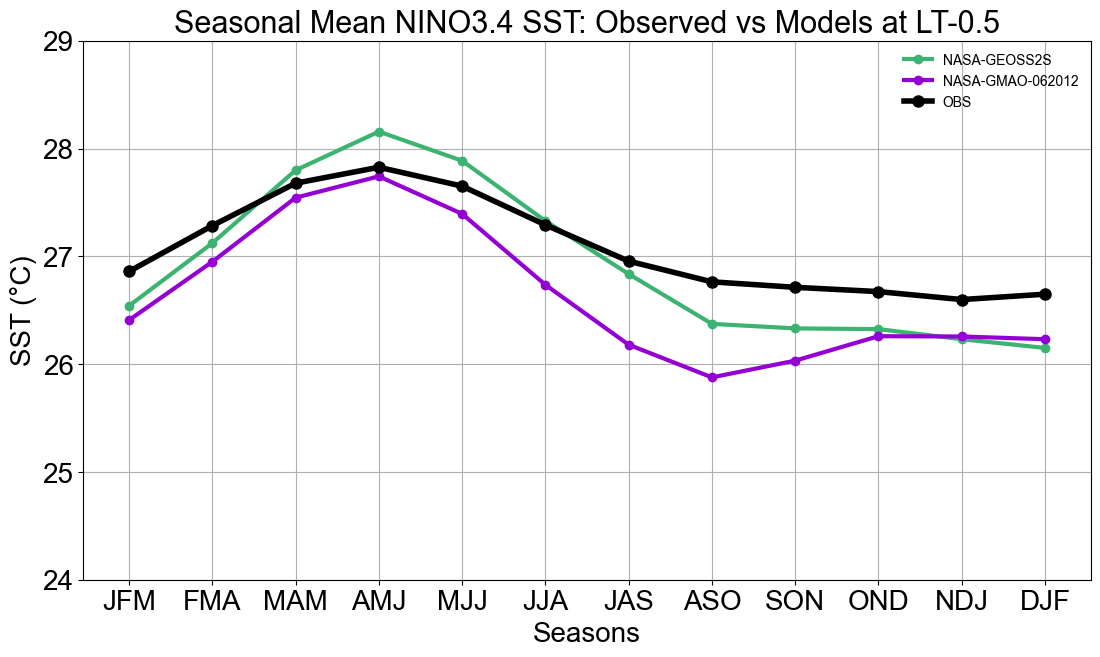

In [28]:
#follow this convention for all LDC graphs. 
def multimodel_sst_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(nasa_gmao_stat_dfs[f'lead{lead}']['SZN'], nasa_gmao_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GMAO_062012'], marker='o',markersize=6, linewidth=3,linestyle='-', color='darkviolet' ,label = 'NASA-GMAO-062012')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Mean NINO3.4 SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    #plt.savefig(f'../Plots/seasonal_mean_lead{lead}.png', format='png')
    # Show the plot
    plt.show()
    
multimodel_sst_visualizer(1)


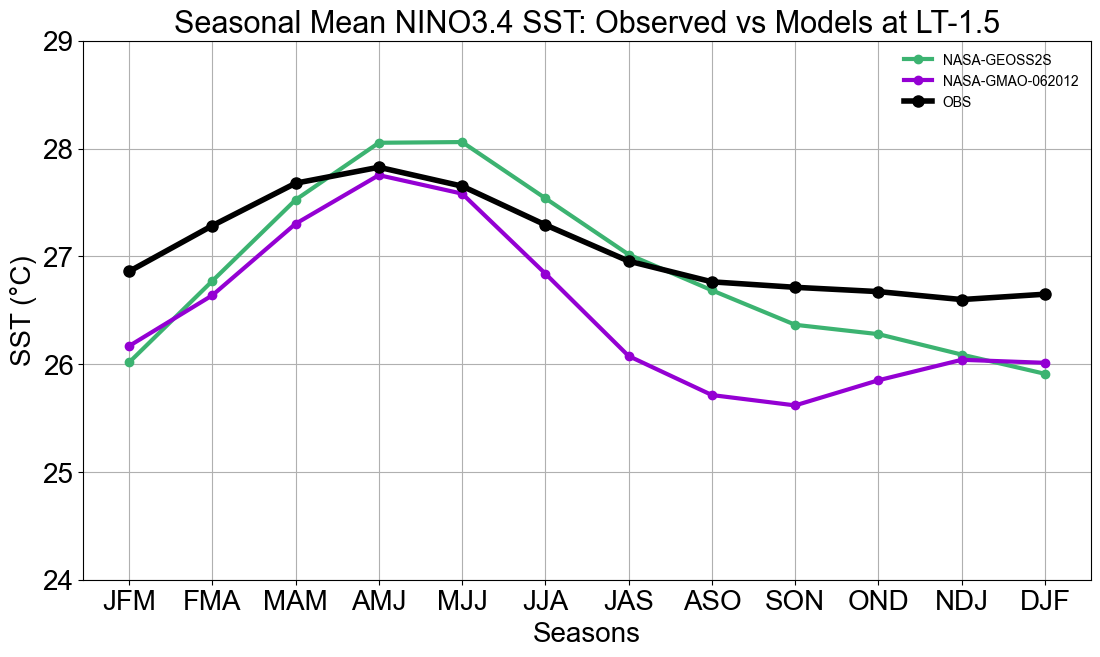

In [29]:
multimodel_sst_visualizer(2)

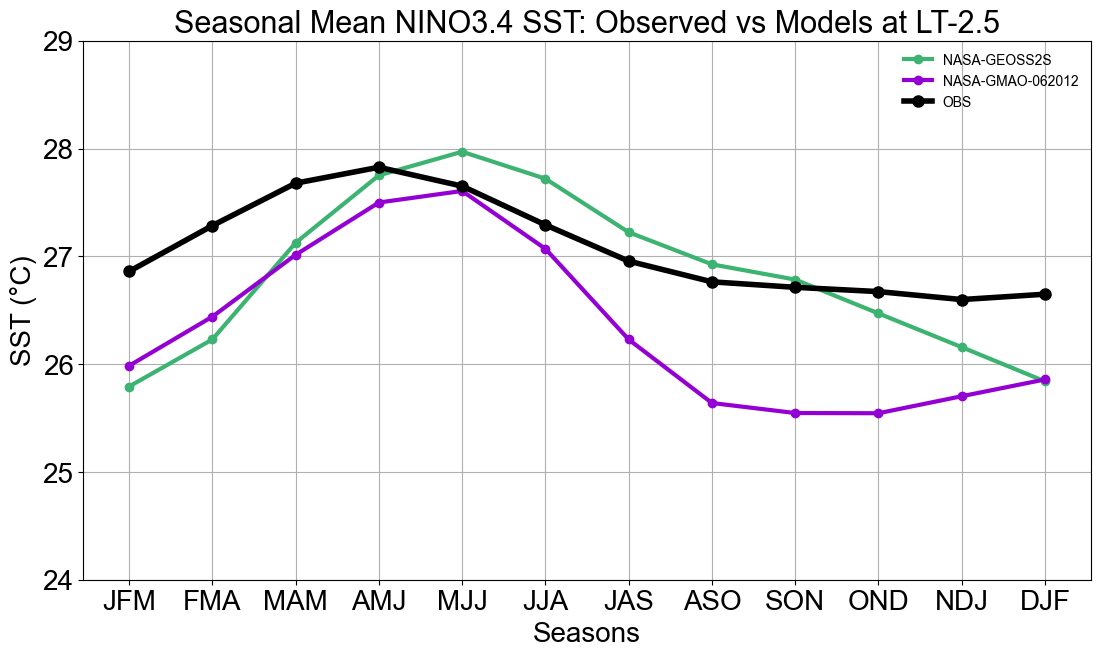

In [30]:
multimodel_sst_visualizer(3)

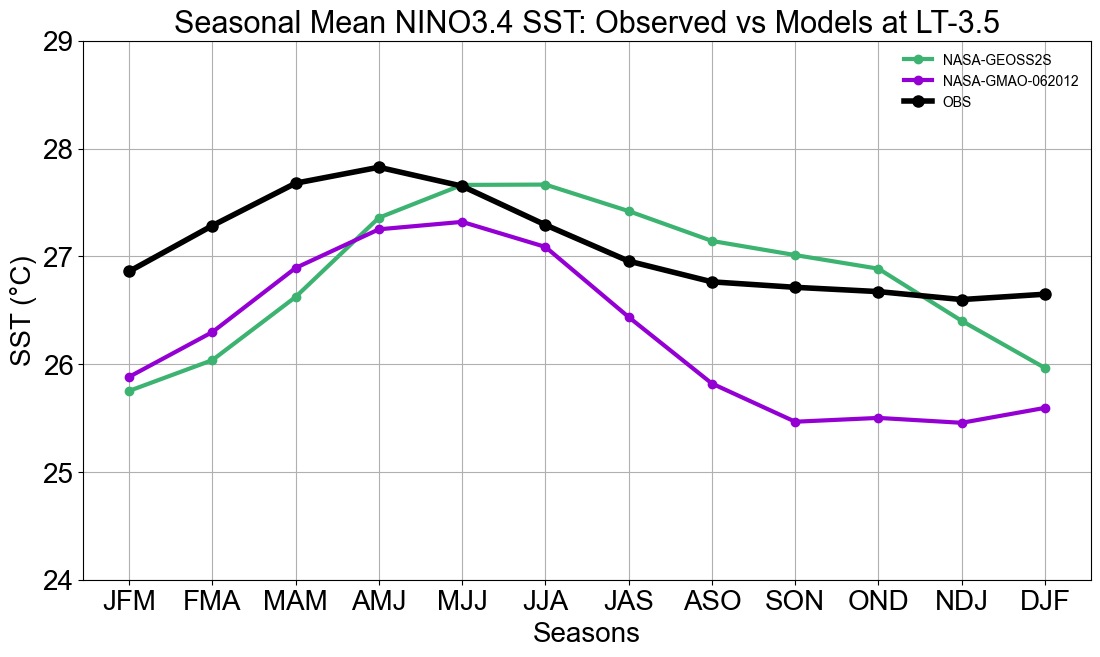

In [31]:
multimodel_sst_visualizer(4)

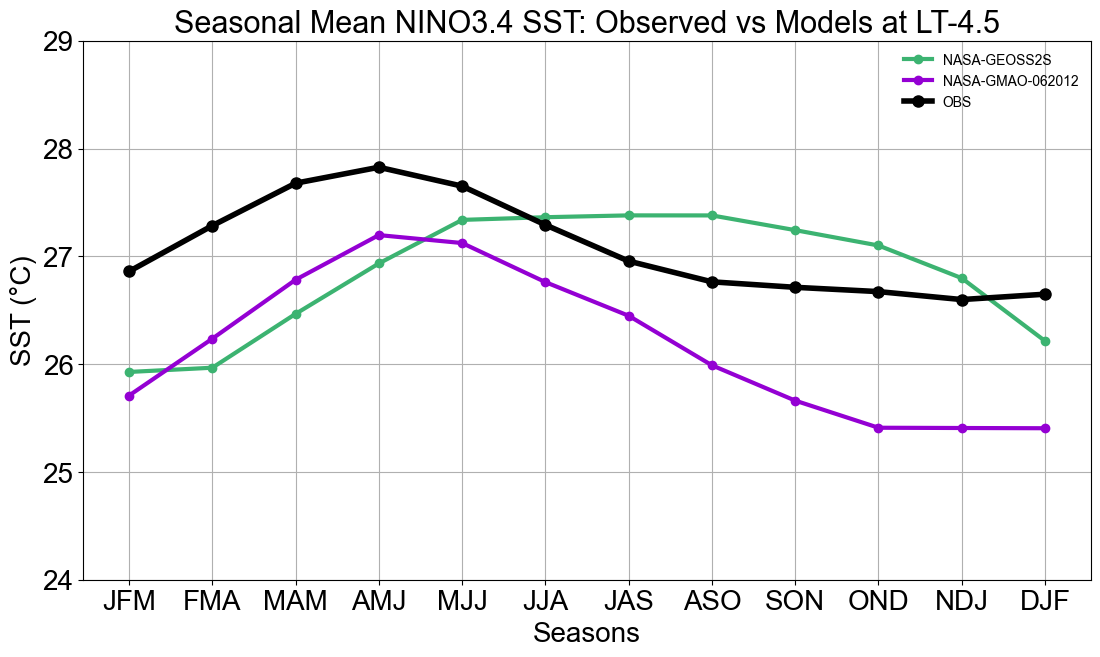

In [32]:
multimodel_sst_visualizer(5)

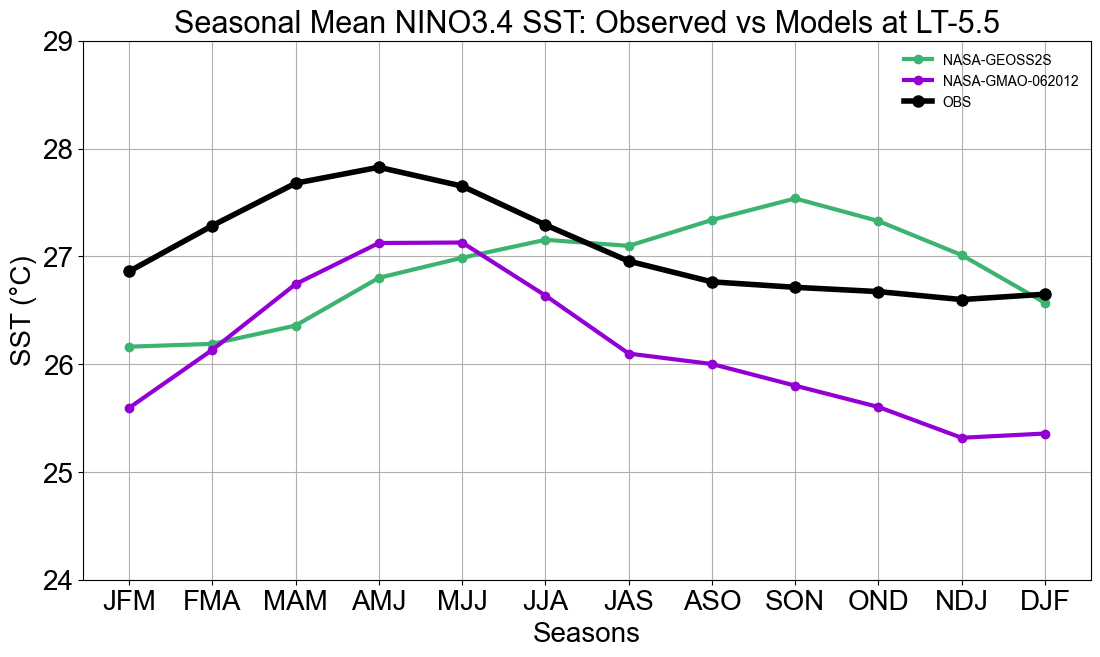

In [33]:
multimodel_sst_visualizer(6)

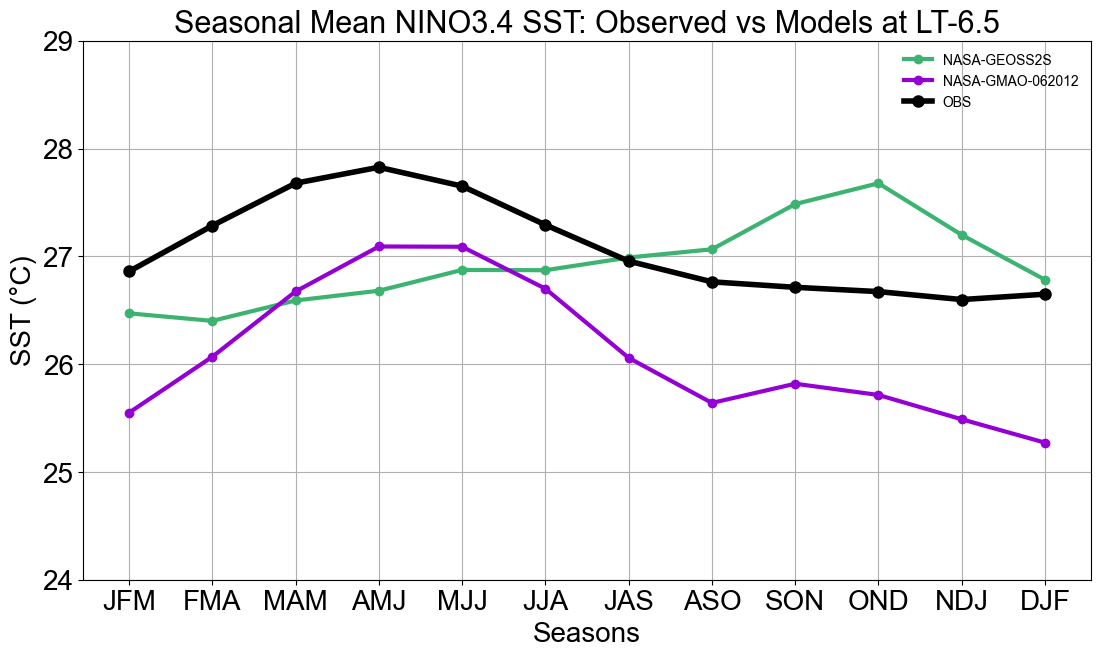

In [34]:
multimodel_sst_visualizer(7)

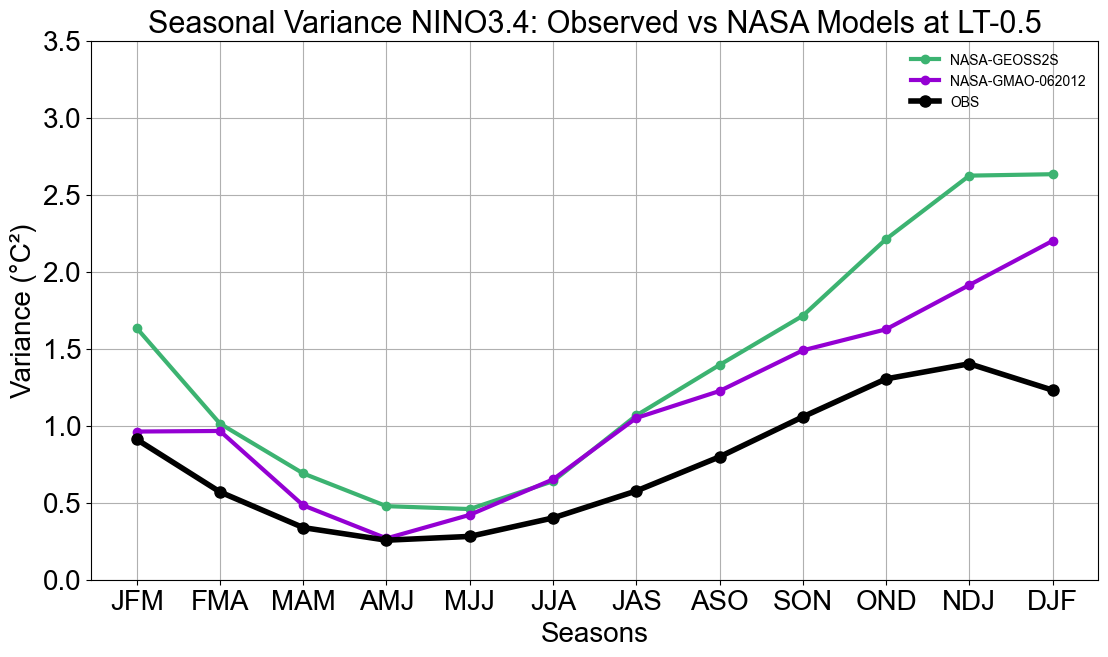

In [35]:
def multimodel_var_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(nasa_gmao_stat_dfs[f'lead{lead}']['SZN'], nasa_gmao_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GMAO_062012'], marker='o',markersize=6, linewidth=3,linestyle='-', color='darkviolet' ,label = 'NASA-GMAO-062012')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['VARIANCE_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Variance NINO3.4: Observed vs NASA Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons',size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    # Show the plot
    plt.savefig(f'../Plots/seasonal_variance_lead{lead}.png', format='png')
    plt.show()
multimodel_var_visualizer(1)


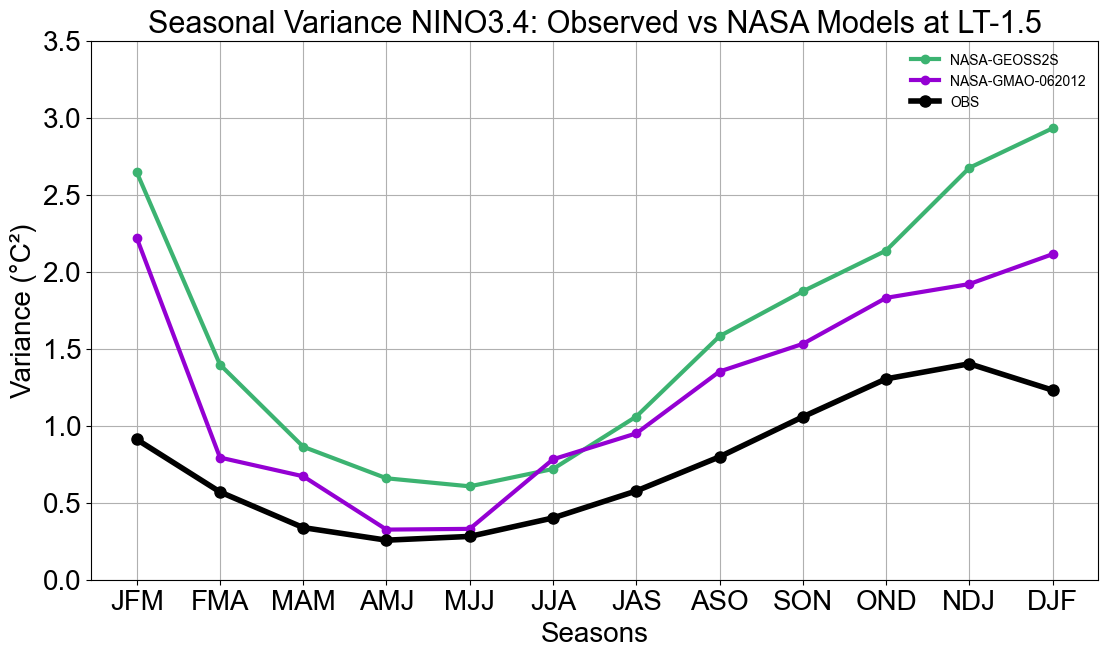

In [36]:
multimodel_var_visualizer(2)

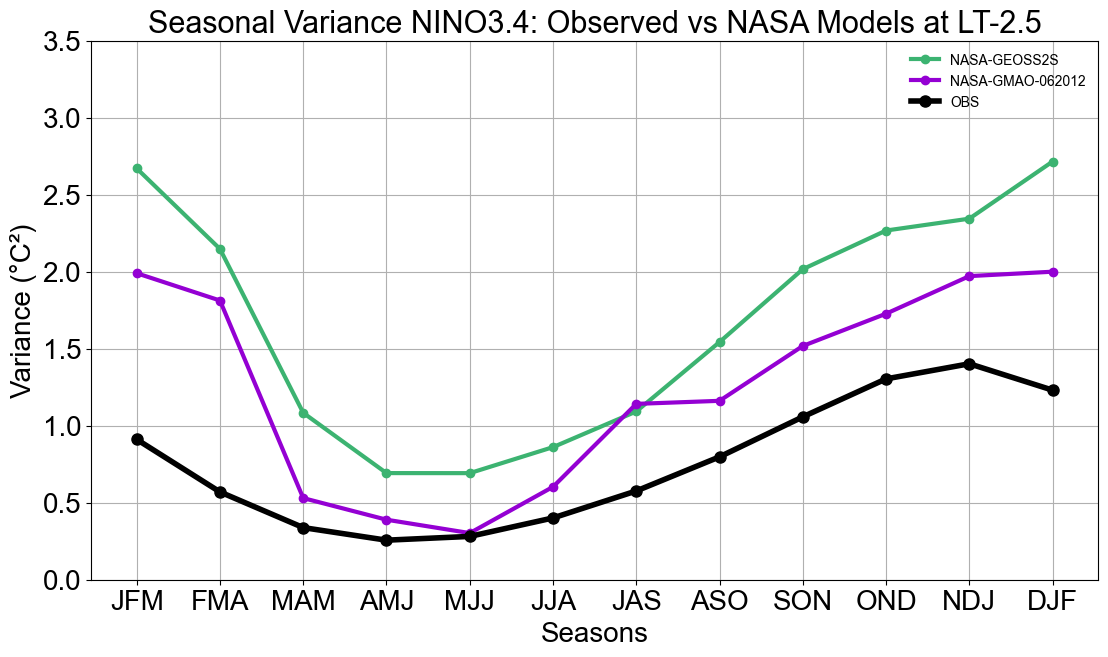

In [37]:
multimodel_var_visualizer(3)

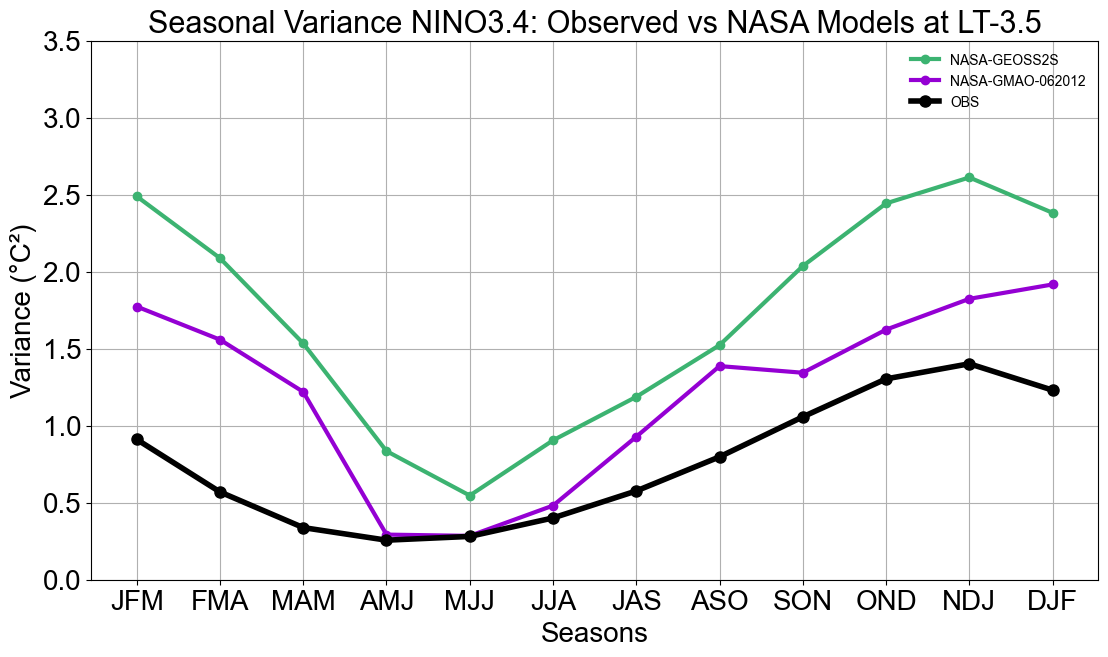

In [38]:
multimodel_var_visualizer(4)

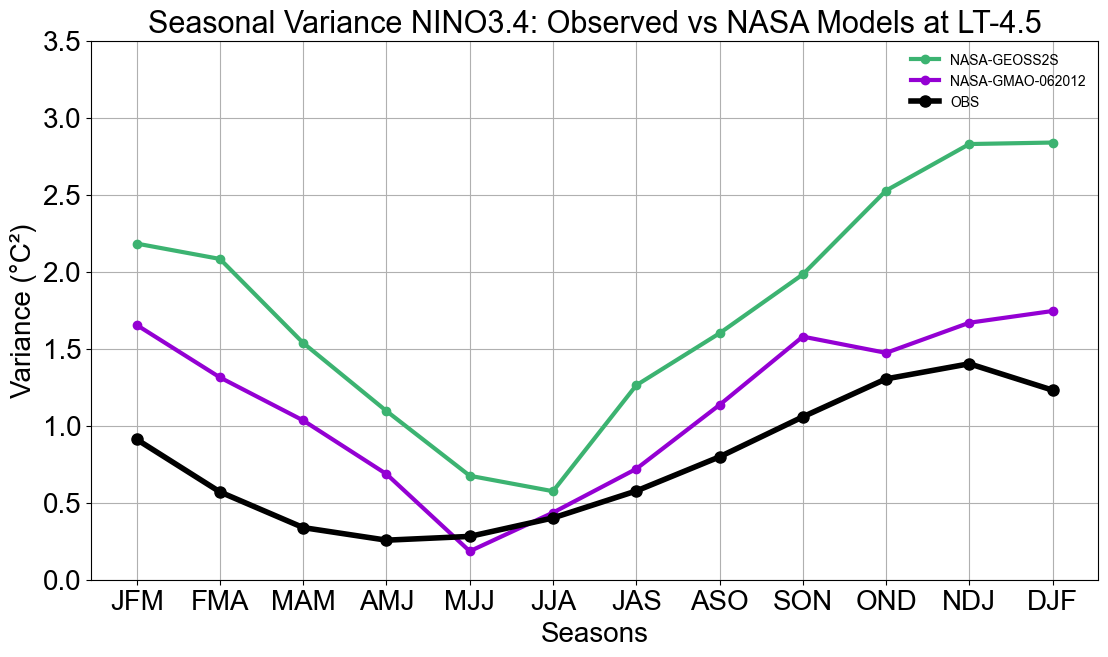

In [39]:
multimodel_var_visualizer(5)

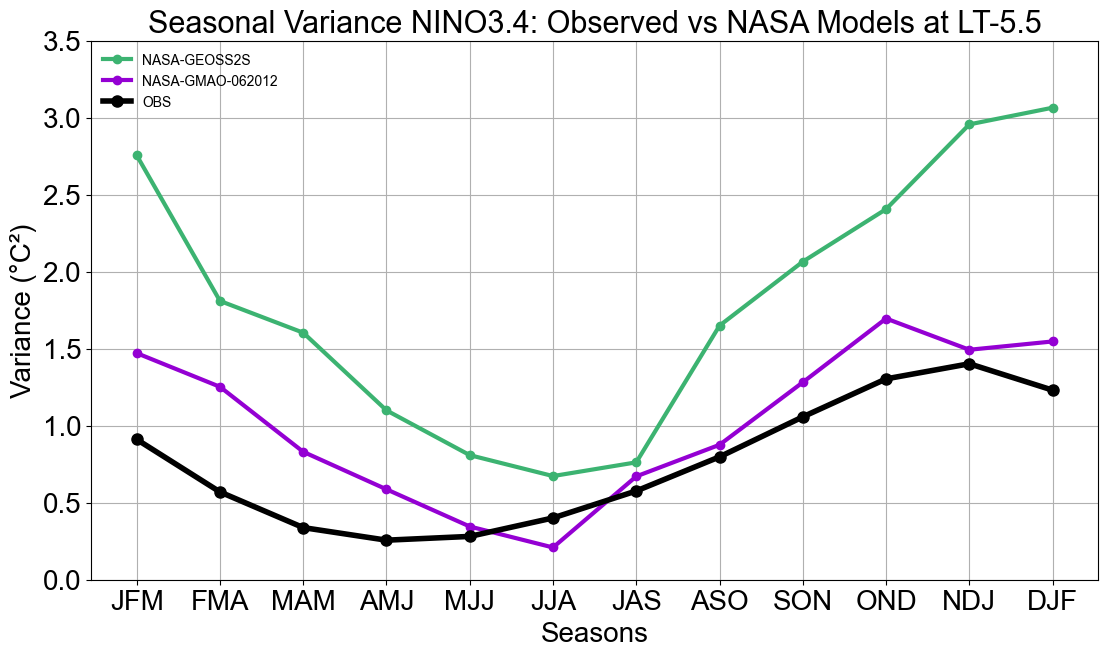

In [40]:
multimodel_var_visualizer(6)

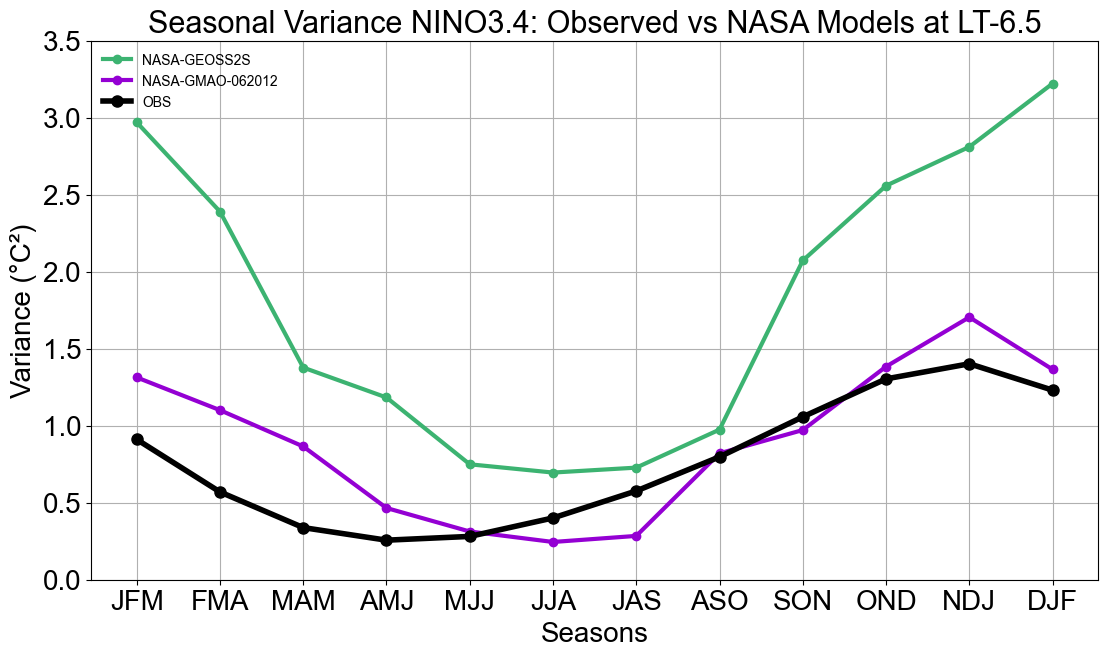

In [41]:
multimodel_var_visualizer(7)